# **ADULT INCOME DATASET**

# **Exercise 1: Applying Cross-Validation to Random Forest Classifier**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult (3).csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

data = pd.read_csv(list(uploaded.keys())[0])
print(data.head())
print(data.info())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [3]:
feature = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status',
            'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
            'hours-per-week', 'native-country']
target = 'income'

data.replace('?', None, inplace=True)

X = data[feature]
y = data[target]

In [4]:
# Preprocessing
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

numeric_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy='median')),  ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy='most_frequent')),  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [5]:
preprocessor = ColumnTransformer(
    transformers= [
        ('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)
    ])

In [6]:
# Combining preprocessing with RFC
from sklearn.ensemble import RandomForestClassifier
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [9]:
# Evaluating the model using k-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rfc, X, y, cv=5)

In [10]:
# Analyzing cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")
print(f"Standard Deviation of CV Scores: {cv_scores.std()}")

Cross-Validation Scores: [0.85024056 0.85085474 0.85257985 0.85452498 0.85892711]
Mean CV Score: 0.8534254484991509
Standard Deviation of CV Scores: 0.0031287160838378326


# **Exercise 2: Investigating Overfitting and Underfitting in Gradient Boosting Machines**

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Range of Estimators & learning rates to test
n_estimators_range = [50, 100, 200, 500]
learning_rates = [0.01, 0.1, 0.2, 0.5]

train_scores = []
val_scores = []

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

for lr in learning_rates:
  for n_estimators in n_estimators_range:
  # Create a pipeline with preprocessing and the gradient boosting classifier
    gbc_pipeline = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('classifier', GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=lr, random_state=42))
        ])

In [13]:
gbc_pipeline.fit(X_train, y_train)

y_train_pred = gbc_pipeline.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

y_val_pred = gbc_pipeline.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

train_scores.append((n_estimators, lr, train_acc))
val_scores.append((n_estimators, lr, val_acc))

print(f"n_estimators: {n_estimators}, learning_rate: {lr}")
print(f"Training Accuracy: {train_acc}, Validation Accuracy: {val_acc}")

n_estimators: 500, learning_rate: 0.5
Training Accuracy: 0.9100657743198628, Validation Accuracy: 0.8735796908588391


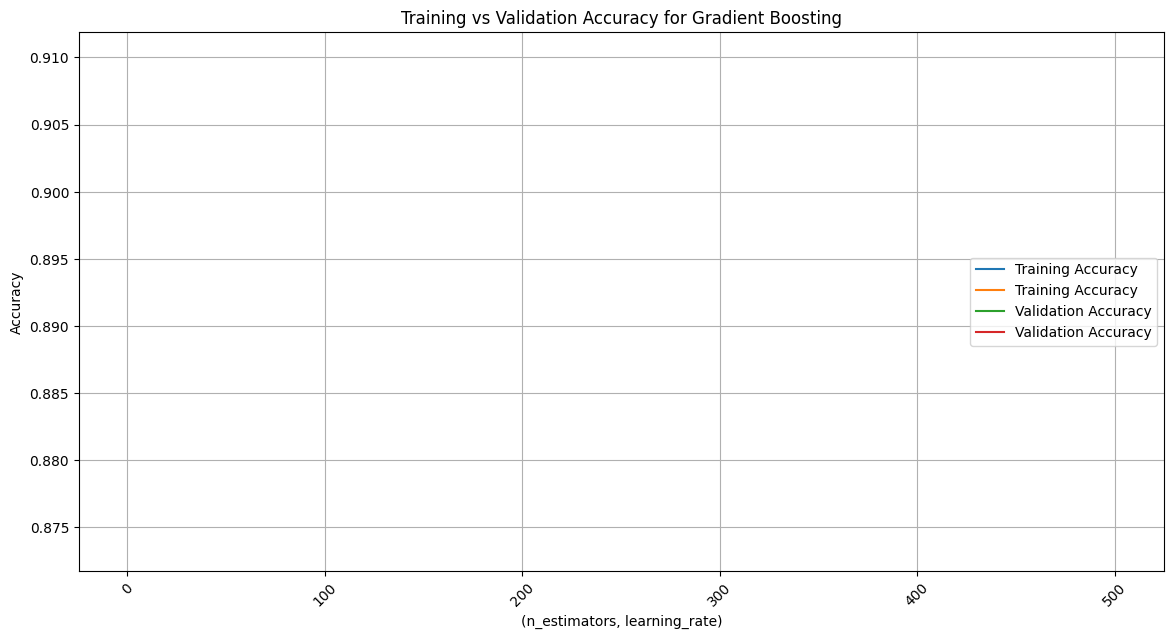

In [14]:
# Plotting Results
train_accs = [score[2] for score in train_scores]
val_accs = [score[2] for score in val_scores]
params = [(score[0], score[1]) for score in train_scores]

plt.figure(figsize=(14, 7))
plt.plot(params, train_accs, label='Training Accuracy')
plt.plot(params, val_accs, label='Validation Accuracy')
plt.xlabel('(n_estimators, learning_rate)')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Gradient Boosting')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# **Exercise 3: Evaluating Precision, Recall, and F1-Score for Random Forests**

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train RFC
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = rfc.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, pos_label='>50K')
recall = recall_score(y_test, y_pred, pos_label='>50K')
f1 = f1_score(y_test, y_pred, pos_label='>50K')

In [17]:
# Results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

Precision: 0.7295285359801489
Recall: 0.6419213973799127
F1-Score: 0.6829268292682926

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7479
        >50K       0.73      0.64      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



# **Exercise 4: ROC Curve and AUC for Gradient Boosting Classifier**

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Predicting probabilities for positive class
y_probs = gbc.predict_proba(X_test)[:, 1]

In [19]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label='>50K')
roc_auc = auc(fpr, tpr)

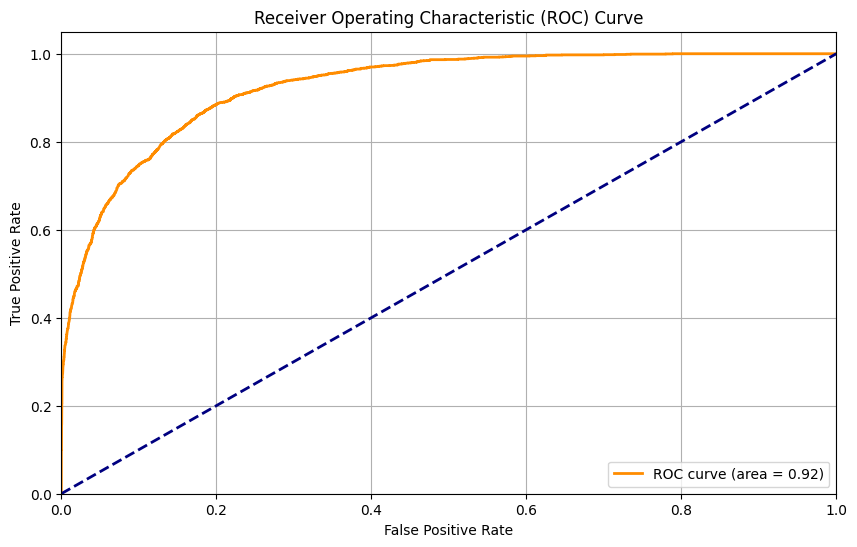

In [20]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [21]:
print(f"AUC (Area Under the Curve): {roc_auc:.2f}")

AUC (Area Under the Curve): 0.92


# **Exercise 5: Model Performance Comparison with Different Metrics**

In [7]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import label_binarize

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [8]:
# Preprocessing for categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])

In [9]:
# Defining models with preprocessing
classifiers = {
    'SVM': Pipeline(steps=[('preprocessor', preprocessor),  ('classifier', SVC(probability=True, random_state=42))]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),  ('classifier', RandomForestClassifier(random_state=42))]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor),  ('classifier', GradientBoostingClassifier(random_state=42))])
}

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label='>50K'),
    'recall': make_scorer(recall_score, pos_label='>50K'),
    'f1': make_scorer(f1_score, pos_label='>50K'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

results = {}

In [10]:
X_subset = X.sample(frac=0.1, random_state=42)
y_subset = y.loc[X_subset.index]

for name, clf in classifiers.items():
    print(f"Evaluating {name} on a subset of data...")

    cv_results = {}
    for metric_name, metric in scoring.items():
        if metric_name == 'roc_auc':
            y_prob = cross_val_predict(clf, X_subset, y_subset, cv=3, method='predict_proba', n_jobs=-1)[:, 1]
            cv_results[metric_name] = roc_auc_score(y_subset, y_prob)
        else:
            cv_results[metric_name] = np.mean(cross_val_score(clf, X_subset, y_subset, cv=3, scoring=metric, n_jobs=-1))

    results[name] = cv_results

Evaluating SVM on a subset of data...
Evaluating Random Forest on a subset of data...
Evaluating Gradient Boosting on a subset of data...


In [11]:
# Printing Results
for name, metrics in results.items():
    print(f"\n{name} Performance Metrics:")
    for metric_name, score in metrics.items():
        print(f"{metric_name.capitalize()}: {score:.2f}")


SVM Performance Metrics:
Accuracy: 0.77
Precision: 0.94
Recall: 0.03
F1: 0.05
Roc_auc: 0.61

Random Forest Performance Metrics:
Accuracy: 0.85
Precision: 0.72
Recall: 0.60
F1: 0.65
Roc_auc: 0.90

Gradient Boosting Performance Metrics:
Accuracy: 0.86
Precision: 0.77
Recall: 0.61
F1: 0.68
Roc_auc: 0.92
